## 1. Linear regression impact on outliers

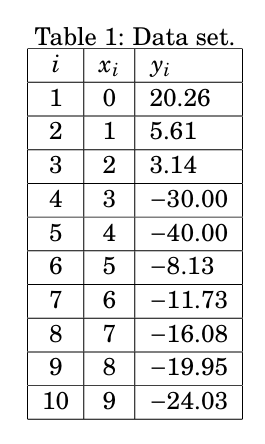

**Use all data given to find a linear regression model**

**Ploting x, y as a scatter plot and ploting linear regression model in the same scatter plot**

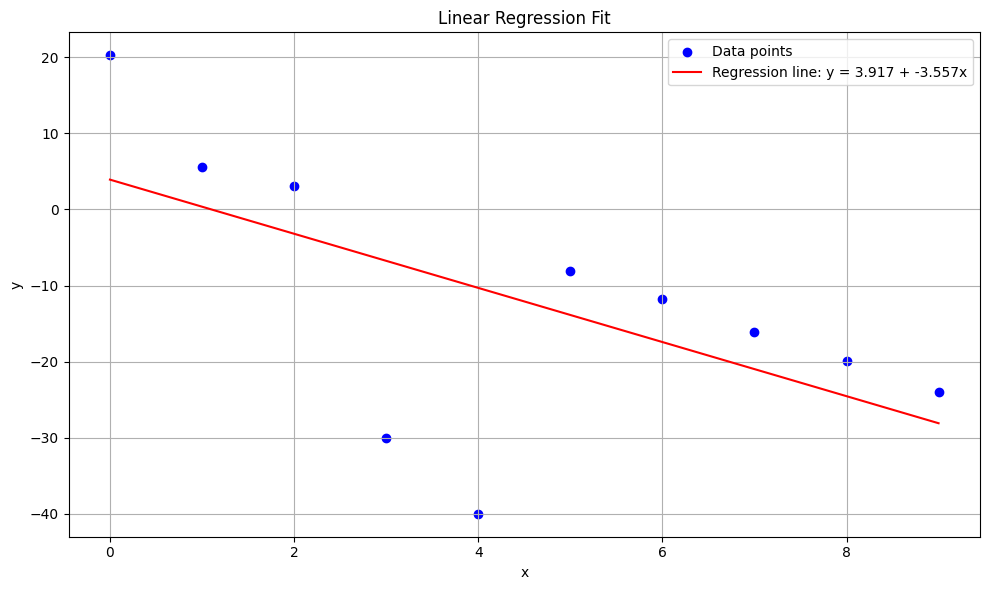

Regression Line Equation: y = 3.917 + -3.557x


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data points (Table 1: Data Set)
x_i = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_i = [20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03]

# Create design matrix X (with a column of 1s for intercept) and target vector Y
X = np.array([[1, x] for x in x_i])  
Y = np.array([[y] for y in y_i])      

# print("X =", X)
# print("Y =", Y)

# Apply OLS formula: w = (X^T X)^(-1) X^T Y
X_T = X.T
w_OLS = np.linalg.inv(X_T @ X) @ X_T @ Y

# Extract coefficients
intercept = w_OLS[0, 0]
slope = w_OLS[1, 0]

# Predict y values using the regression model
x_range = np.linspace(min(x_i), max(x_i), 100)
y_predicted = intercept + slope * x_range

# Step 4: Plot original data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_i, y_i, color='blue', label='Data points')
plt.plot(x_range, y_predicted, color='red', label=f'Regression line: y = {intercept:.3f} + {slope:.3f}x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

print(f"Regression Line Equation: y = {intercept:.3f} + {slope:.3f}x")


**Compare with y = -4x + 12 model**

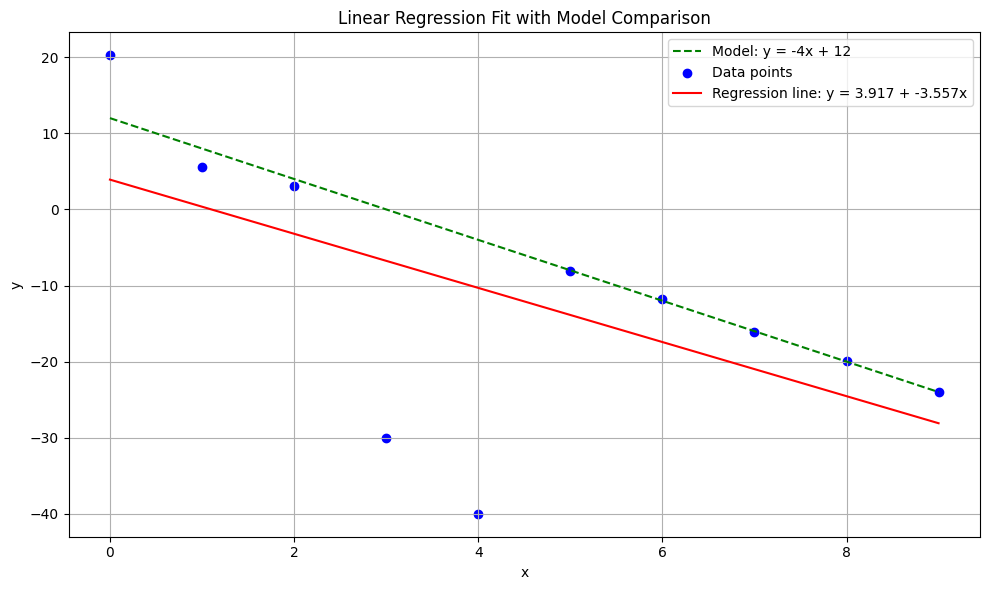

In [2]:
# Compare with the model y = -4x + 12
y_model = lambda x: -4 * x + 12

# Plot the model line
x_model = np.linspace(min(x_i), max(x_i), 100)
y_model_values = y_model(x_model)
# Plot the model line
plt.figure(figsize=(10, 6))
plt.plot(x_model, y_model_values, color='green', label='Model: y = -4x + 12', linestyle='--')
# Add the model line to the existing plot
plt.scatter(x_i, y_i, color='blue', label='Data points')
plt.plot(x_range, y_predicted, color='red', label=f'Regression line: y = {intercept:.3f} + {slope:.3f}x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit with Model Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()


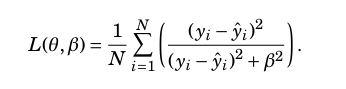

β = 1.000000:
  Model 1 (y = -4x + 12) loss: 0.4354
  Model 2 (y = -3.55x + 3.91) loss: 0.9728

β = 0.000001:
  Model 1 (y = -4x + 12) loss: 1.0000
  Model 2 (y = -3.55x + 3.91) loss: 1.0000

β = 1000.000000:
  Model 1 (y = -4x + 12) loss: 0.0002
  Model 2 (y = -3.55x + 3.91) loss: 0.0002



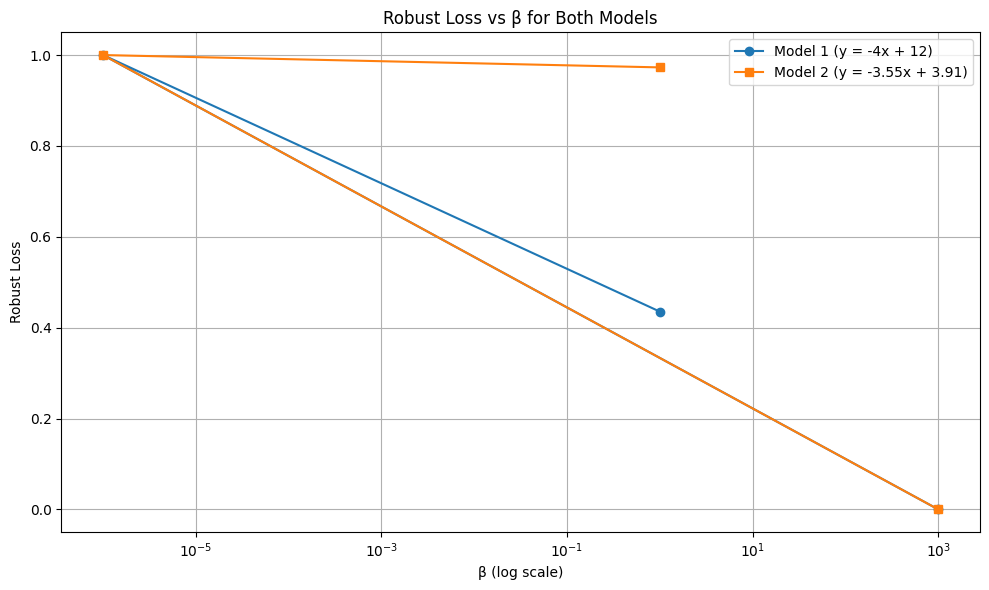

In [3]:
def robust_loss(y_true, y_pred, beta):
    N = len(y_true)
    squared_errors = (y_true - y_pred) ** 2
    loss = np.mean(squared_errors / (squared_errors + beta**2))
    return loss

# Generate predictions for both models
y_model1 = -4 * np.array(x_i) + 12  # Model 1
y_model2 = -3.55 * np.array(x_i) + 3.91  # Model 2

# Test different beta values
beta_values = [1, 10**(-6), 10**(3)]
results = []

for beta in beta_values:
    loss_model1 = robust_loss(y_i, y_model1, beta)
    loss_model2 = robust_loss(y_i, y_model2, beta)
    results.append({
        'beta': beta,
        'loss_model1': loss_model1,
        'loss_model2': loss_model2
    })

# Create a table of results
for result in results:
    print(f"β = {result['beta']:.6f}:")
    print(f"  Model 1 (y = -4x + 12) loss: {result['loss_model1']:.4f}")
    print(f"  Model 2 (y = -3.55x + 3.91) loss: {result['loss_model2']:.4f}")
    print()

# Visualize how the loss changes with beta
plt.figure(figsize=(10, 6))
plt.semilogx(beta_values, [r['loss_model1'] for r in results], 'o-', label='Model 1 (y = -4x + 12)')
plt.semilogx(beta_values, [r['loss_model2'] for r in results], 's-', label='Model 2 (y = -3.55x + 3.91)')
plt.xlabel('β (log scale)')
plt.ylabel('Robust Loss')
plt.title('Robust Loss vs β for Both Models')
plt.legend()
plt.grid(True)
plt.xscale('log')  # Ensure x-axis is in log scale
plt.tight_layout()

**Q5**  


- When $\beta = 10^{-6}$
    - In this case for both models the loss function value becomes really close to 1 since the denomonator and the numarator becomes nearly equal (since $\beta^2$ term is nealy zero for small values). This makes the loss function **more sensitive to the outliers** in the dataset.

- When $\beta = 1$
    - In this case for both models the loss function gives balanced values.
    This time loss funtion is little less sensitive to the outliers but not as sensitive as earlier.This allows to make the more **Robust to outliers** while being sensitive enough to differntiate between the performance of differnt models on the given data.

- When $\beta = 10^{3}$
    - In this case for both models the loss function value becomes really close to 0 since the denomonator becomes nearly equal to $\beta^2$. This makes the model **less sensitive to the oultiers** in the data set.The low loss values make it **harder to differentiate between the models**, as they both appear to perform well.


**Due to these reasons $\beta = 1$ is the best value to choose**

**Q6**  


- Using $\beta = 1$ Model 1 (*y = -4x + 12*) is the better choise because the loss: 0.4354 and the loss: 0.9728 for Model 2 (*y = -3.55x + 3.91*)
    - The robust loss at $\beta = 1$ directly measures how well a model explains the data while reducing the effect of outliers. A lower robust loss indicates a better fit under this robust criterion.
    - Numerically Model 1’s loss is substantially lower than Model 2’s at $\beta = 1$. Therefore Model 1 better explains the bulk of the data while being less influenced by extreme points, which is exactly the goal when using a robust estimator.

**Therefore Choose Model 1.**
- ***y = -4x + 12***

**Q7 – How does this robust estimator reduce the impact of the outliers?**  

The loss function is:  

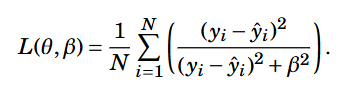

- **When the error** $(y_i - \hat{y}_i)^2$ **is small compared to** $\beta^2$:  
  The fraction is small, so these points contribute only a little to the loss — similar to normal squared error.  

- **When the error is large** (from an outlier):  
  The denominator grows almost as much as the numerator, and the fraction approaches 1. This means no matter how huge the error is, its contribution is capped at 1.  

By doing this, the loss function prevents large errors from dominating the total loss, making the model less affected by outliers. The value of $\beta$ controls when this “capping” effect starts.


**Q8 — Identify another loss function that can be used for this robust estimator**

A common alternative is the **Huber loss**. It is defined (for residual $r = y - \hat y$) as:

$$
\ell_{\delta}(r) =
\begin{cases}
\frac{1}{2}r^2 & \text{if } |r| \le \delta,\\[4pt]
\delta\big(|r|-\tfrac{1}{2}\delta\big) & \text{if } |r| > \delta.
\end{cases}
$$

### Why Huber:

* Huber is **quadratic for small residuals** (like MSE) and **linear for large residuals** (like absolute error), so it reduces the influence of large errors while staying differentiable and convex.
* The parameter $\delta$ plays a role similar to $\beta$: it sets the threshold between “squared” and “linear” regimes, enabling robustness tuning.

Other possible robust losses (briefly): **Tukey’s biweight**, **Cauchy loss**; Huber is the simplest widely used choice.

## 2. Loss Function

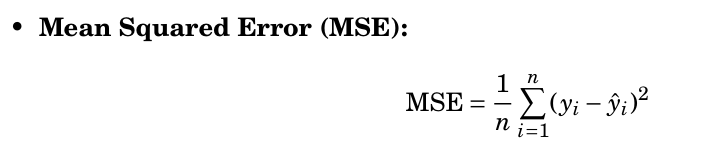

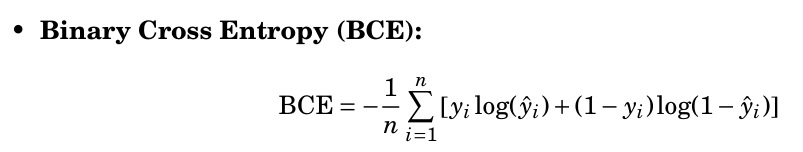

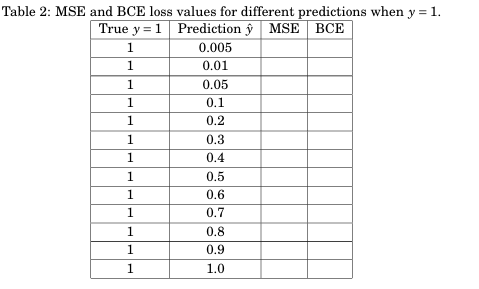

Table 2: MSE and BCE loss values for different predictions when y = 1
True y=1 | Prediction ŷ |    MSE    |    BCE
---------------------------------------------
    1    |    0.005     | 0.990025 | 5.298317
    1    |    0.010     | 0.980100 | 4.605170
    1    |    0.050     | 0.902500 | 2.995732
    1    |    0.100     | 0.810000 | 2.302585
    1    |    0.200     | 0.640000 | 1.609438
    1    |    0.300     | 0.490000 | 1.203973
    1    |    0.400     | 0.360000 | 0.916291
    1    |    0.500     | 0.250000 | 0.693147
    1    |    0.600     | 0.160000 | 0.510826
    1    |    0.700     | 0.090000 | 0.356675
    1    |    0.800     | 0.040000 | 0.223144
    1    |    0.900     | 0.010000 | 0.105361
    1    |    1.000     | 0.000000 | 0.000000


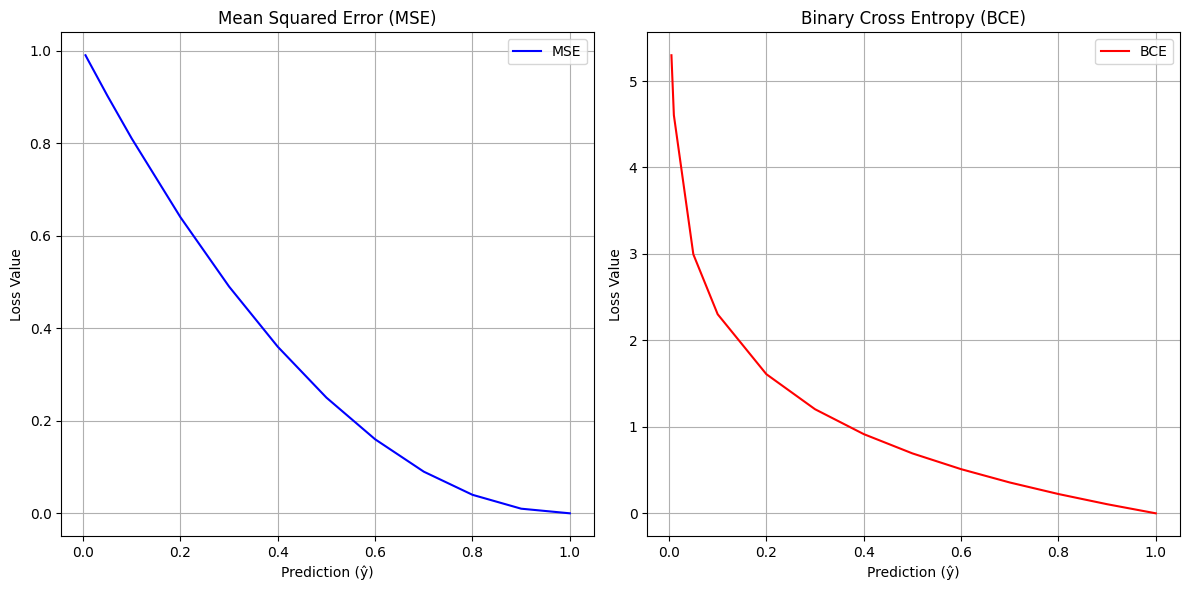

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the true labels (all 1's in this case)
y_true = np.ones(11)  # 11 samples, all with true value 1

# Define the predictions ranging from 0.005 to 1.0
y_pred = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Function to calculate Binary Cross Entropy (BCE)
def calculate_bce(y_true, y_pred):
    # Add small epsilon to avoid log(0)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Calculate losses for each prediction
mse_values = []
bce_values = []

for pred in y_pred:
    # Calculate MSE for current prediction
    mse = calculate_mse(y_true, pred)
    mse_values.append(mse)
    
    # Calculate BCE for current prediction
    bce = calculate_bce(y_true, pred)
    bce_values.append(bce)

# Create a table of results
print("Table 2: MSE and BCE loss values for different predictions when y = 1")
print("True y=1 | Prediction ŷ |    MSE    |    BCE")
print("-" * 45)
for pred, mse, bce in zip(y_pred, mse_values, bce_values):
    print(f"    1    |    {pred:.3f}     | {mse:.6f} | {bce:.6f}")

# Plotting both loss functions
plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(y_pred, mse_values, 'b-', label='MSE')
plt.xlabel('Prediction (ŷ)')
plt.ylabel('Loss Value')
plt.title('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()

# Plot BCE
plt.subplot(1, 2, 2)
plt.plot(y_pred, bce_values, 'r-', label='BCE')
plt.xlabel('Prediction (ŷ)')
plt.ylabel('Loss Value')
plt.title('Binary Cross Entropy (BCE)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Application 1: Linear Regression with Continuous Dependent Variable
**Selection: Mean Squared Error (MSE)**

Justification:

1. MSE is ideal for continuous variables because:

    - It directly measures the squared difference between predicted and actual values
    - It penalizes larger errors more heavily (due to squaring)
    - It can handle both positive and negative prediction errors
    - The gradient of MSE is proportional to the error, making optimization straightforward

2. BCE would be inappropriate because:

    - BCE expects probabilities between 0 and 1
    - It's designed for binary classification, not continuous prediction
    - Using BCE for continuous values could lead to undefined behavior (log of negative numbers)

### Application 2: Logistic Regression with Binary Dependent Variable
**Selection: Binary Cross Entropy (BCE)**

Justification:

1. BCE is perfect for binary classification because:

    - It's specifically designed for probabilities in range [0,1]
    - It measures the difference between probability distributions
    - It provides stronger gradients when predictions are confident but wrong
    - It naturally fits with the logistic function's output range

2. MSE would be suboptimal because:

    - It doesn't account for the probabilistic nature of binary classification
    - It can lead to slower convergence in binary problems
    - The gradients can become very small when predictions are far from targets

## 3. Data pre-processing

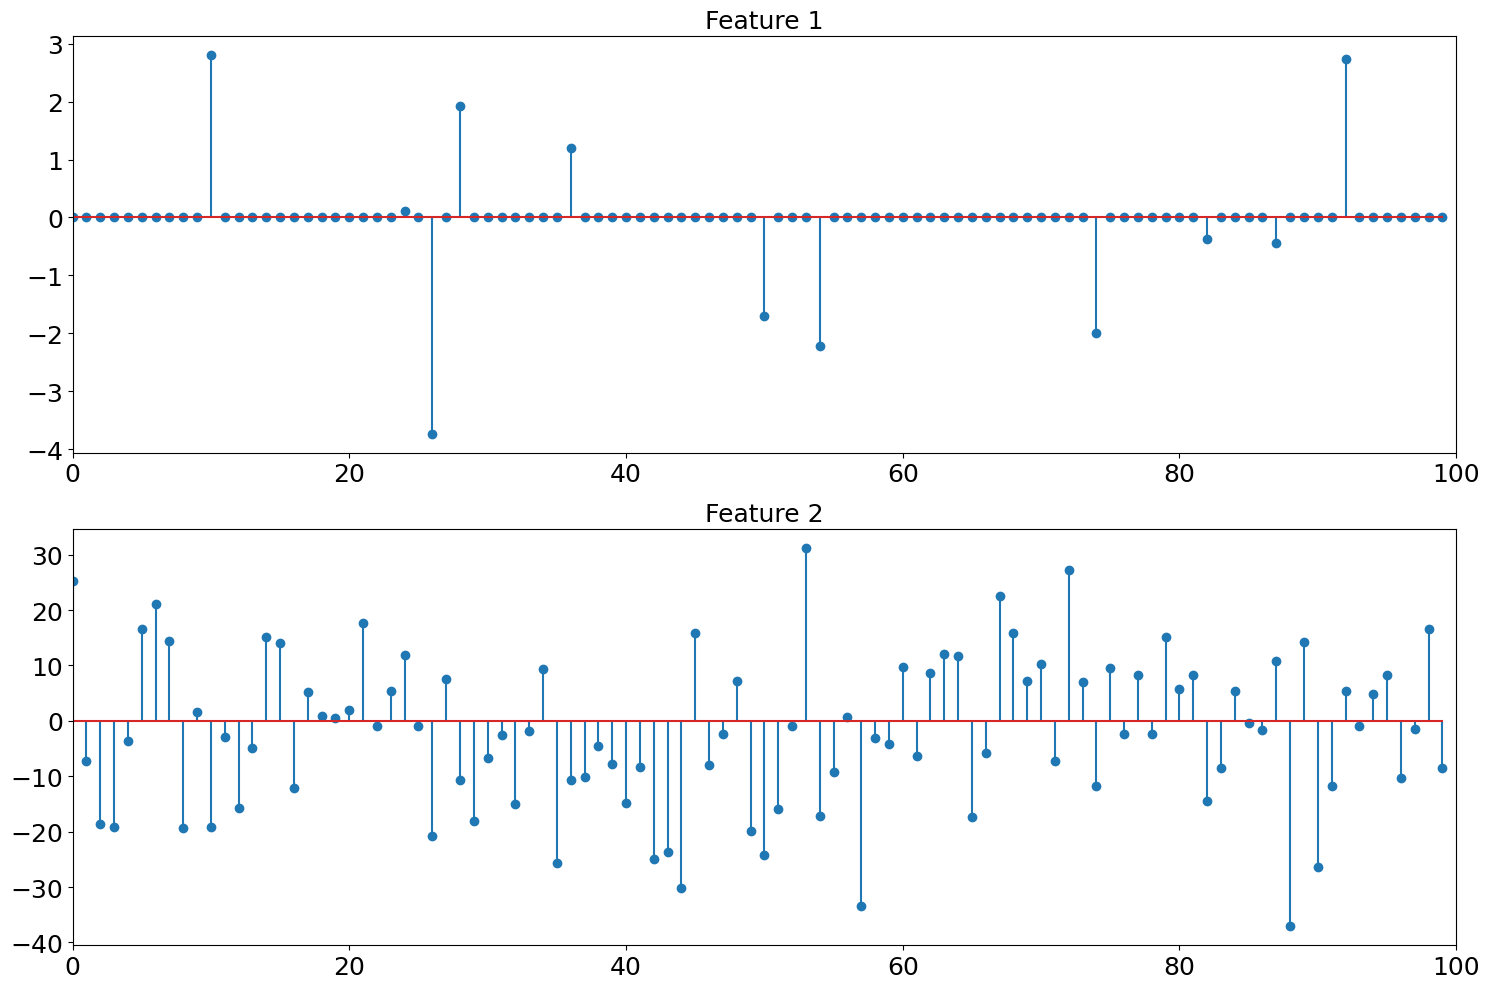

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    """
    Generate a sparse signal with specified number of non-zero elements
    
    Parameters:
    signal_length (int): Length of the signal to generate
    num_nonzero (int): Number of non-zero elements to include
    
    Returns:
    numpy.ndarray: Generated sparse signal
    """
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

# Define parameters
signal_length = 100  # Total length of the signal
num_nonzero = 10    # Number of non-zero elements in the signal
your_index_no = 220332  # Enter your index no without english letters and without leading zeros

# Generate sparse signal
sparse_signal = generate_signal(signal_length, num_nonzero)

# Modify signal based on index number
sparse_signal[10] = (your_index_no % 10) * 2 + 10
if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30

# Scale the signal
sparse_signal = sparse_signal / 5

# Generate random noise for feature 2
epsilon = np.random.normal(0, 15, signal_length)

# Create visualization
plt.figure(figsize=(15, 10))

# Plot Feature 1
plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(sparse_signal)

# Plot Feature 2
plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=18)
plt.stem(epsilon)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.show()

### Feature Analysis

**Feature 1 (Sparse Signal):**

- Contains many zero values (sparse)
- Has a few non-zero elements
- Structure needs to be preserved (sparsity is important)
- Contains both positive and negative values

**Feature 2 (Random Noise):**

- Normally distributed around zero
- Contains both positive and negative values
- Has consistent variance
- No sparsity to preserve

### Recommended Scaling Methods

**For Feature 1: MaxAbs Scaling**

Justification:
- Preserves sparsity (zero values remain zero)
- Maintains the sign of values
- Scales data to [-1, 1] range without shifting the mean
- Doesn't destroy the sparse structure like standard scaling would
- Better than min-max scaling which would shift zeros away from zero

**For Feature 2: Standard Scaling**

Justification:
- Ideal for normally distributed data
- Centers the data around zero (preserves the distribution's shape)
- Makes the variance uniform (σ = 1)
- Handles outliers better than min-max scaling
- Appropriate when the feature's mean and variance are meaningful

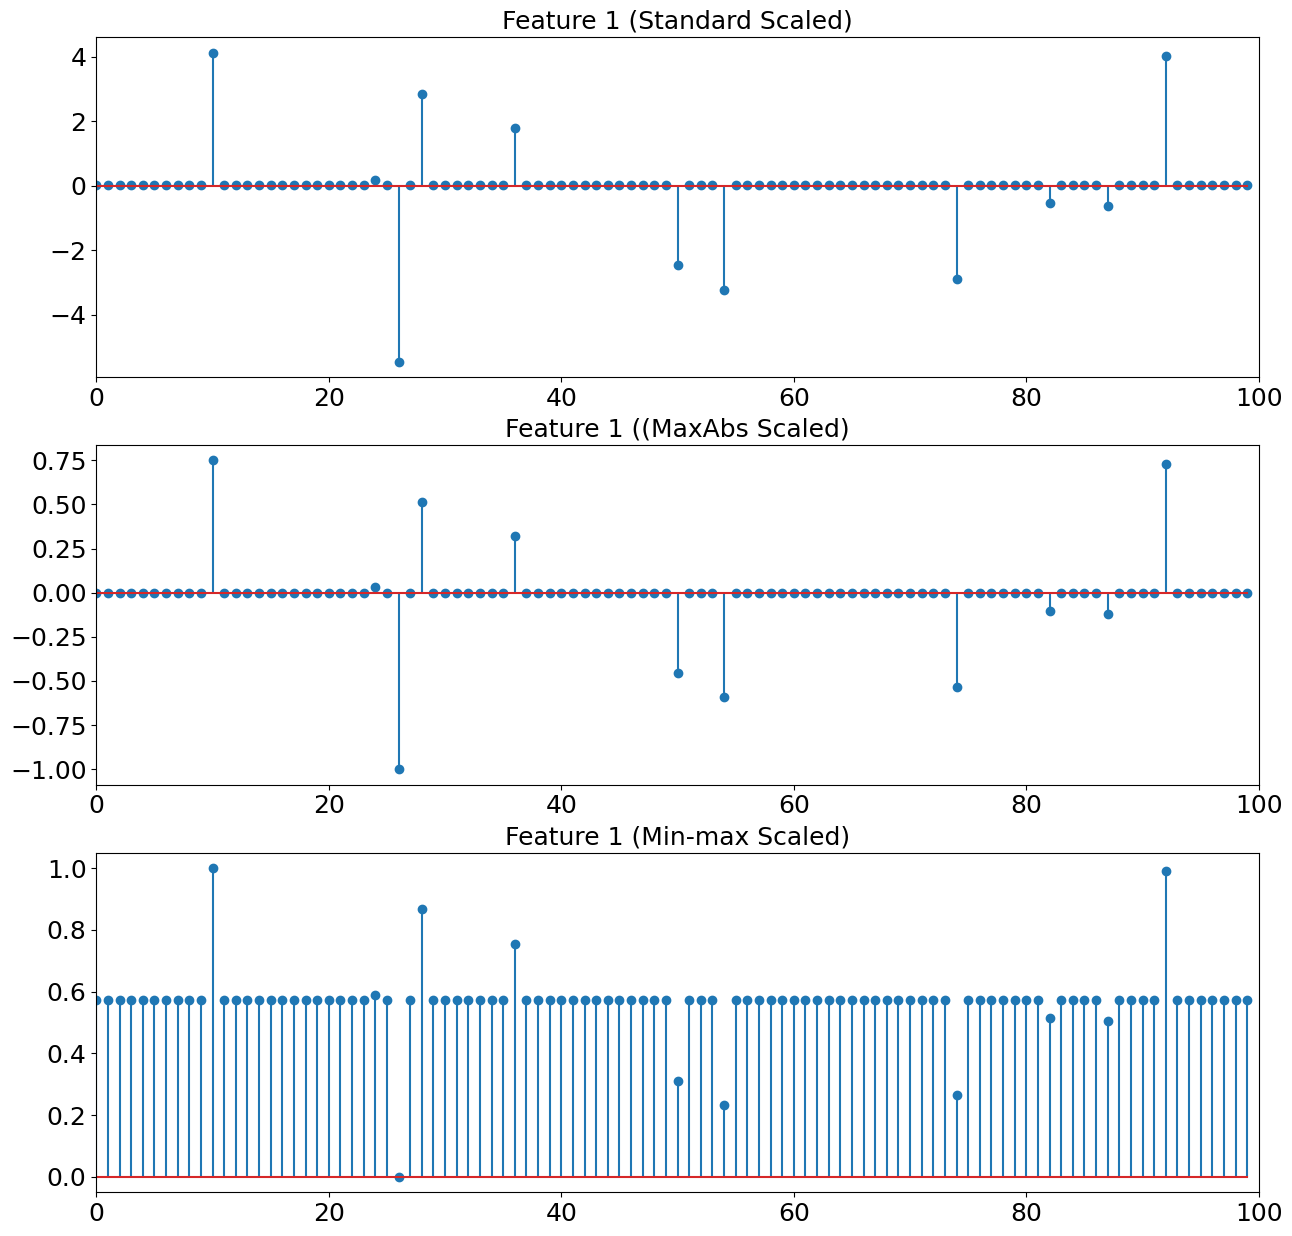

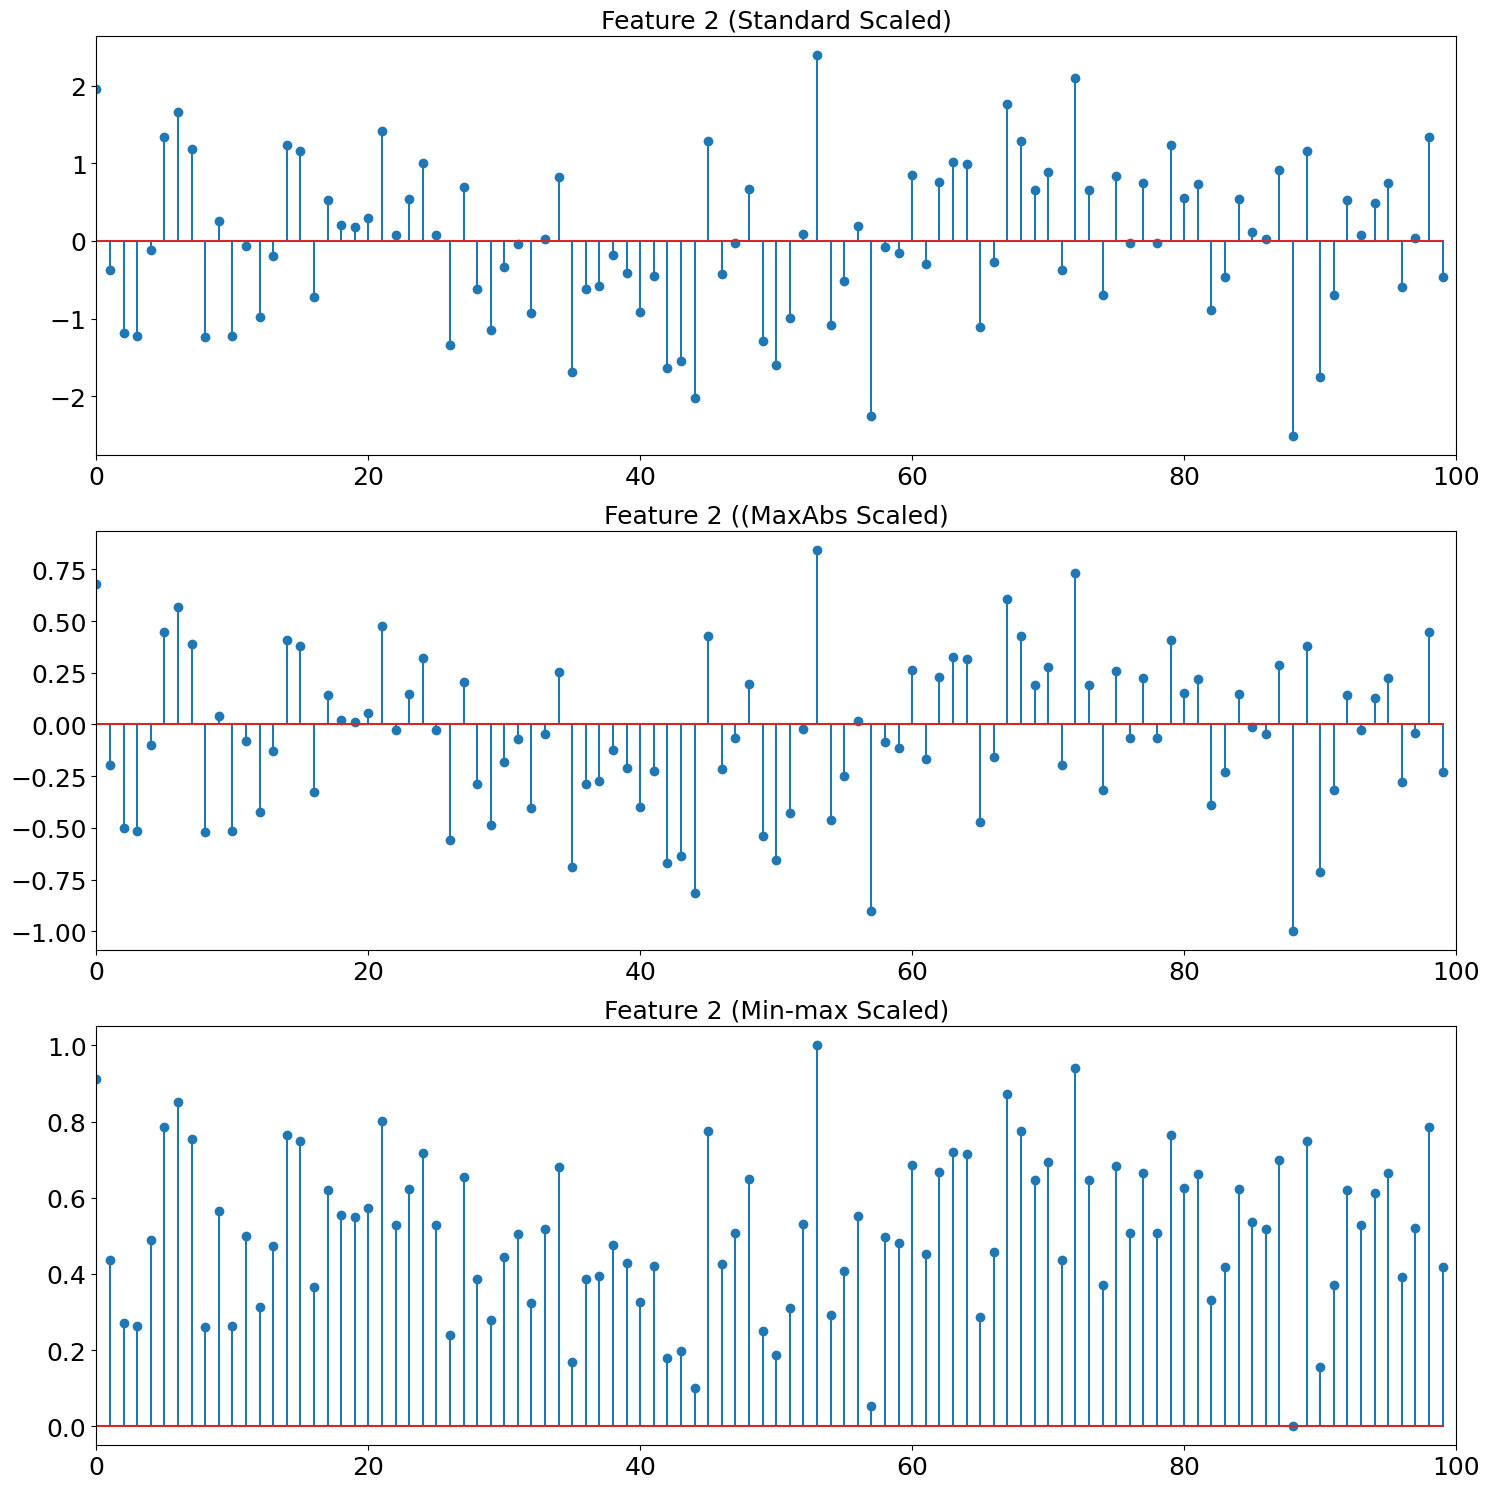

In [6]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Create scalers
maxabs_scaler = MaxAbsScaler()
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Scale features
feature1_scaled_maxabs = maxabs_scaler.fit_transform(sparse_signal.reshape(-1, 1)).ravel()
feature1_scaled_std = standard_scaler.fit_transform(sparse_signal.reshape(-1, 1)).ravel()
feature1_scaled_minmax = minmax_scaler.fit_transform(sparse_signal.reshape(-1, 1)).ravel()

feature2_scaled_maxabs = maxabs_scaler.fit_transform(epsilon.reshape(-1, 1)).ravel()
feature2_scaled_std = standard_scaler.fit_transform(epsilon.reshape(-1, 1)).ravel()
feature2_scaled_minmax = minmax_scaler.fit_transform(epsilon.reshape(-1, 1)).ravel()

# Plot scaled Feature 1
plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1 (Standard Scaled)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(feature1_scaled_std)

plt.subplot(3, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 1 ((MaxAbs Scaled)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(feature1_scaled_maxabs)

plt.subplot(3, 1, 3)
plt.xlim(0, signal_length)
plt.title("Feature 1 (Min-max Scaled)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(feature1_scaled_minmax)


# Plot scaled Feature 2
plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 2 (Standard Scaled)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(feature2_scaled_std)

plt.subplot(3, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2 ((MaxAbs Scaled)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(feature2_scaled_maxabs)

plt.subplot(3, 1, 3)
plt.xlim(0, signal_length)
plt.title("Feature 2 (Min-max Scaled)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(feature2_scaled_minmax)

# plt.subplots_adjust(hspace=0.4)
plt.tight_layout()
plt.show()